## Loading data

In [18]:
import pandas as pd
import numpy as np
df = pd.read_json("hf://datasets/allenai/multipref/MultiPref-Train.jsonl", lines=True)

ConnectionError: (MaxRetryError('HTTPSConnectionPool(host=\'huggingface.co\', port=443): Max retries exceeded with url: /api/datasets/allenai/multipref (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x165954c50>: Failed to resolve \'huggingface.co\' ([Errno 8] nodename nor servname provided, or not known)"))'), '(Request ID: 17a020c8-733f-4b8c-bae0-8b1a293153f0)')

In [ ]:
normal_list = []
expert_list = []
for index, row in df.iterrows():
    worker_answer = row["normal_worker_annotations"]
    expert_answer = row["expert_worker_annotations"]
    for i in range(len(worker_answer)):
        worker_id = worker_answer[i]['evaluator']
        if worker_id not in normal_list:
            normal_list.append(worker_id)
    for i in range(len(expert_answer)):
        expert_id = expert_answer[i]['evaluator']
        if expert_id not in expert_list:
            expert_list.append(expert_id)

worker_list = normal_list + expert_list
signals = {'A-is-clearly-better': 0, 'A-is-slightly-better': 1, 'Tie': 2, 'B-is-slightly-better':3, 'B-is-clearly-better': 4}
human_data = np.full((len(worker_list), len(df)), np.nan)
for j, row in df.iterrows():
    worker_answer = row["normal_worker_annotations"]
    expert_answer = row["expert_worker_annotations"]
    for i in range(len(worker_answer)):
        worker_id = worker_answer[i]['evaluator']
        index = worker_list.index(worker_id)
        r = signals[worker_answer[i]['overall_pref']]
        human_data[index, j] = r
    for i in range(len(expert_answer)):
        expert_id = expert_answer[i]['evaluator']
        index = worker_list.index(expert_id)
        r = signals[expert_answer[i]['overall_pref']]
        human_data[index, j] = r

answered_question = []
for i in range(np.size(human_data, axis = 0)):
    valid_index = np.where(~np.isnan(human_data[i,:]))[0]
    answered_question.append(len(valid_index))

print('average number of questions per labeler =', np.average(answered_question))

In [ ]:
import torch

file_path = 'multipref/gpt-4o-mini/total_output_labels.pt'
signals = {'A-is-clearly-better': 0, 'A-is-better': 0, 'A-is-slightly-better': 1, 'Tie': 2, 'B-is-slightly-better':3, 'B-is-clearly-better': 4, 'B-is-better': 4}

llm_data = np.array(torch.load(file_path))
n = len(llm_data)

gpt4_data = np.ones(n)*np.nan
for i in range(len(llm_data)):
    if llm_data[i] ==  None:
        continue
    r = signals[llm_data[i]['final verdict']]
    gpt4_data[i] = r

file_path = 'multipref/gpt-4o-mini_1/total_output_labels.pt'
signals = {'A-is-clearly-better': 0, 'A-is-better': 0, 'A-is-slightly-better': 1, 'Tie': 2, 'B-is-slightly-better':3, 'B-is-clearly-better': 4, 'B-is-better': 4}

llm_data = np.array(torch.load(file_path))
n = len(llm_data)

gpt4_data_2 = np.ones(n)*np.nan
for i in range(len(llm_data)):
    if llm_data[i] ==  None:
        continue
    r = signals[llm_data[i]['final verdict']]
    gpt4_data_2[i] = r

file_path = 'multipref/gpt-4o-mini_2/total_output_labels.pt'
signals = {'A-is-clearly-better': 0, 'A-is-better': 0, 'A-is-slightly-better': 1, 'Tie': 2, 'B-is-slightly-better':3, 'B-is-clearly-better': 4, 'B-is-better': 4}

llm_data = np.array(torch.load(file_path))
n = len(llm_data)

gpt4_data_3 = np.ones(n)*np.nan
for i in range(len(llm_data)):
    if llm_data[i] ==  None:
        continue
    r = signals[llm_data[i]['final verdict']]
    gpt4_data_3[i] = r
    

file_path = 'multipref/gpt-3.5-turbo/total_output_labels.pt'
signals = {'A-is-clearly-better': 0, 'A-is-slightly-better': 1, 'Tie': 2, 'B-is-slightly-better':3, 'B-is-clearly-better': 4}

llm_data = np.array(torch.load(file_path))

gpt3_data = np.ones(n)*np.nan
for i in range(len(llm_data)):
    if llm_data[i] ==  None:
        continue
    if 'final verdict' in llm_data[i].keys():
        r = signals[llm_data[i]['final verdict']]
    else:
        r = signals[llm_data[i]['final_verdict']]
    gpt3_data[i] = r


file_path = 'multipref/gpt-3.5-turbo_1/total_output_labels.pt'
signals = {'A-is-clearly-better': 0, 'Response A-is-clearly-better': 0, 'A-is-slightly-better': 1, 'Tie': 2, 'B-is-slightly-better':3, 'B-is-clearly-better': 4}

llm_data = np.array(torch.load(file_path))

gpt3_data_2 = np.ones(n)*np.nan
for i in range(len(llm_data)):
    if llm_data[i] ==  None:
        continue
    if 'final verdict' in llm_data[i].keys():
        r = signals[llm_data[i]['final verdict']]
    else:
        r = signals[llm_data[i]['final_verdict']]
    gpt3_data_2[i] = r


file_path = 'multipref/gpt-3.5-turbo_2/total_output_labels.pt'
signals = {'A-is-clearly-better': 0, 'Response A is clearly better': 0, 'A-is-slightly-better': 1, 'Tie': 2, 'B-is-slightly-better':3, 'B-is-clearly-better': 4}

llm_data = np.array(torch.load(file_path))

gpt3_data_3 = np.ones(n)*np.nan
for i in range(len(llm_data)):
    if llm_data[i] ==  None:
        continue
    if 'final verdict' in llm_data[i].keys():
        r = signals[llm_data[i]['final verdict']]
    else:
        r = signals[llm_data[i]['final_verdict']]
    gpt3_data_3[i] = r
    

file_path = 'multipref/gemma-2-2b-it/output_labels_all.pt'
signals = {'A-is-clearly-better': 0, 'A-is-slightly-better': 1, 'o A-is-slightly-better': 1, 'Tie': 2, 'B-is-slightly-better':3, 'B-is-clearly-better': 4}

llm_data = np.array(torch.load(file_path))

gemma_data = np.ones(n)*np.nan
for i in range(len(llm_data)):
    if llm_data[i] ==  None:
        continue
    if 'final verdict' in llm_data[i].keys():
        if llm_data[i]['final verdict'] not in signals.keys():
            continue
        r = signals[llm_data[i]['final verdict']]
    elif 'final_verdict' in llm_data[i].keys():
        r = signals[llm_data[i]['final_verdict']]
    else:
        r = np.nan
    gemma_data[i] = r


file_path = 'multipref/gemma-2-2b-it_1/output_labels_all.pt'
signals = {'A-is-clearly-better': 0, 'A-is-slightly-better': 1, 'o A-is-slightly-better': 1, 'Tie': 2, 'B-is-slightly-better':3, 'B-is-clearly-better': 4}

llm_data = np.array(torch.load(file_path))

gemma_data_2 = np.ones(n)*np.nan
for i in range(len(llm_data)):
    if llm_data[i] ==  None:
        continue
    if 'final verdict' in llm_data[i].keys():
        if llm_data[i]['final verdict'] not in signals.keys():
            continue
        r = signals[llm_data[i]['final verdict']]
    elif 'final_verdict' in llm_data[i].keys():
        r = signals[llm_data[i]['final_verdict']]
    else:
        r = np.nan
    gemma_data_2[i] = r


file_path = 'multipref/gemma-2-2b-it_2/output_labels_all.pt'
signals = {'A-is-clearly-better': 0, 'A-is-slightly-better': 1, 'o A-is-slightly-better': 1, 'Tie': 2, 'B-is-slightly-better':3, 'B-is-clearly-better': 4}

llm_data = np.array(torch.load(file_path))

gemma_data_3 = np.ones(n)*np.nan
for i in range(len(llm_data)):
    if llm_data[i] ==  None:
        continue
    if 'final verdict' in llm_data[i].keys():
        if llm_data[i]['final verdict'] not in signals.keys():
            continue
        r = signals[llm_data[i]['final verdict']]
    elif 'final_verdict' in llm_data[i].keys():
        r = signals[llm_data[i]['final_verdict']]
    else:
        r = np.nan
    gemma_data_3[i] = r


file_path = 'multipref/Mistral-7B-Instruct-v0.3/output_labels_all.pt'
signals = {'A-is-clearly-better': 0, 'Response A-is-clearly-better': 0, 'A-is-slightly-better': 1, 'Response A-is-slightly-better': 1, 'Tie': 2, 'B-is-slightly-better':3, 'B-is-clearly-better': 4}

llm_data = np.array(torch.load(file_path))
n = len(llm_data)

mistral_data = np.ones(n)*np.nan
for i in range(len(llm_data)):
    if llm_data[i] ==  None:
        continue
    if 'final verdict' in llm_data[i].keys():
        if llm_data[i]['final verdict'] not in signals.keys():
            continue
        r = signals[llm_data[i]['final verdict']]
    elif 'final_verdict' in llm_data[i].keys():
        r = signals[llm_data[i]['final_verdict']]
    else:
        r = np.nan
    mistral_data[i] = r

file_path = 'multipref/Mistral-7B-Instruct-v0.3_1/output_labels_all.pt'
signals = {'A-is-clearly-better': 0, 'Response A-is-clearly-better': 0, 'A-is-slightly-better': 1, 'Response A-is-slightly-better': 1, 'Tie': 2, 'B-is-slightly-better':3, 'B-is-clearly-better': 4}

llm_data = np.array(torch.load(file_path))
n = len(llm_data)

mistral_data_2 = np.ones(n)*np.nan
for i in range(len(llm_data)):
    if llm_data[i] ==  None:
        continue
    if 'final verdict' in llm_data[i].keys():
        if llm_data[i]['final verdict'] not in signals.keys():
            continue
        r = signals[llm_data[i]['final verdict']]
    elif 'final_verdict' in llm_data[i].keys():
        r = signals[llm_data[i]['final_verdict']]
    else:
        r = np.nan
    mistral_data_2[i] = r

file_path = 'multipref/Mistral-7B-Instruct-v0.3_2/output_labels_all.pt'
signals = {'A-is-clearly-better': 0, 'Response A-is-clearly-better': 0, 'A-is-slightly-better': 1, 'Response A-is-slightly-better': 1, 'Tie': 2, 'B-is-slightly-better':3, 'B-is-clearly-better': 4}

llm_data = np.array(torch.load(file_path))
n = len(llm_data)

mistral_data_3 = np.ones(n)*np.nan
for i in range(len(llm_data)):
    if llm_data[i] ==  None:
        continue
    if 'final verdict' in llm_data[i].keys():
        if llm_data[i]['final verdict'] not in signals.keys():
            continue
        r = signals[llm_data[i]['final verdict']]
    elif 'final_verdict' in llm_data[i].keys():
        r = signals[llm_data[i]['final_verdict']]
    else:
        r = np.nan
    mistral_data_3[i] = r


file_path = 'multipref/Phi-3.5-mini-instruct/output_labels_all.pt'
signals = {'A-is-clearly-better': 0, 'A-is-slightly-better': 1, 'Tie': 2, 'tie': 2, 'B-is-slightly-better':3, 'B-is-clearly-better': 4}

llm_data = np.array(torch.load(file_path))
n = len(llm_data)

phi_data = np.ones(n)*np.nan
for i in range(len(llm_data)):
    if llm_data[i] ==  None:
        continue
    if 'final verdict' in llm_data[i].keys():
        if llm_data[i]['final verdict'] not in signals.keys():
            continue
        r = signals[llm_data[i]['final verdict']]
    elif 'final_verdict' in llm_data[i].keys():
        r = signals[llm_data[i]['final_verdict']]
    else:
        r = np.nan
    phi_data[i] = r

file_path = 'multipref/Phi-3.5-mini-instruct_1/output_labels_all.pt'
signals = {'A-is-clearly-better': 0, 'A-is-slightly-better': 1, 'Tie': 2, 'tie': 2, 'B-is-slightly-better':3, 'B-is-clearly-better': 4}

llm_data = np.array(torch.load(file_path))
n = len(llm_data)

phi_data_2 = np.ones(n)*np.nan
for i in range(len(llm_data)):
    if llm_data[i] ==  None:
        continue
    if 'final verdict' in llm_data[i].keys():
        if llm_data[i]['final verdict'] not in signals.keys():
            continue
        r = signals[llm_data[i]['final verdict']]
    elif 'final_verdict' in llm_data[i].keys():
        r = signals[llm_data[i]['final_verdict']]
    else:
        r = np.nan
    phi_data_2[i] = r

file_path = 'multipref/Phi-3.5-mini-instruct_2/output_labels_all.pt'
signals = {'A-is-clearly-better': 0, 'A-is-slightly-better': 1, 'Tie': 2, 'tie': 2, 'B-is-slightly-better':3, 'B-is-clearly-better': 4}

llm_data = np.array(torch.load(file_path))
n = len(llm_data)

phi_data_3 = np.ones(n)*np.nan
for i in range(len(llm_data)):
    if llm_data[i] ==  None:
        continue
    if 'final verdict' in llm_data[i].keys():
        if llm_data[i]['final verdict'] not in signals.keys():
            continue
        r = signals[llm_data[i]['final verdict']]
    elif 'final_verdict' in llm_data[i].keys():
        r = signals[llm_data[i]['final_verdict']]
    else:
        r = np.nan
    phi_data_3[i] = r

## Compute tvd mutual information

In [10]:
"""
Compute joint distributions
"""

import numpy as np
from collections import Counter
from collections import defaultdict

def empirical_joint(v1, v2, K):
    v1 = np.array(v1)
    v2 = np.array(v2)
    
    mask = ~np.isnan(v1) & ~np.isnan(v2)
    
    valid_pairs = list(zip(v1[mask], v2[mask]))
    
    pair_counts = Counter(valid_pairs)
    
    joint_matrix = np.zeros((K, K))
    
    value_to_index = {val: idx for idx, val in enumerate(list(np.arange(K)))}
    
    total_pairs = len(valid_pairs)
    for (a, b), count in pair_counts.items():
        i, j = value_to_index[a], value_to_index[b]
        joint_matrix[i, j] = count / total_pairs
    
    return joint_matrix

def empirical_joint_conditioned(v1, v2, v3, K):
    # Ensure inputs are numpy arrays
    v1 = np.array(v1)
    v2 = np.array(v2)
    v3 = np.array(v3)
    
    # Map each value in sigma to an index
    value_to_index = {val: idx for idx, val in enumerate(list(np.arange(K)))}
    
    # Initialize conditioned joint distribution tensor
    joint_tensor = np.zeros((K, K, K))
    
    # Create a defaultdict to count occurrences conditioned on v3
    conditioned_counts = defaultdict(Counter)
    
    # Mask to filter out nan entries in all vectors
    mask = ~np.isnan(v1) & ~np.isnan(v2) & ~np.isnan(v3)
    
    # Extract valid triples
    valid_triples = list(zip(v1[mask], v2[mask], v3[mask]))
    
    # Count occurrences of each pair (v1, v2) conditioned on v3
    for a, b, c in valid_triples:
        i, j, k = value_to_index[a], value_to_index[b], value_to_index[c]
        joint_tensor[k,i,j] += 1
    joint_tensor = joint_tensor / len(valid_triples)
    return joint_tensor

In [12]:
def Divergence(joint_matrix):
    P_X1 = np.sum(joint_matrix, axis=1)  # Sum over rows to get P(X1)
    P_X2 = np.sum(joint_matrix, axis=0)  # Sum over columns to get P(X2)
    product_matrix = np.outer(P_X1, P_X2)
    
    mask = (joint_matrix > 0) & (product_matrix > 0)
    
    # Compute KL divergence: sum(P(X1, X2) * log(P(X1, X2) / (P(X1) * P(X2))))
    kl_divergence = np.sum(joint_matrix[mask] * np.log(joint_matrix[mask] / product_matrix[mask]))
    tvd_divergence = np.sum(np.abs(joint_matrix - product_matrix))
    supremum_norm = np.max(np.abs(joint_matrix - product_matrix))
    
    return kl_divergence, tvd_divergence, supremum_norm


def Divergence_conditioned(joint_tensor):
    kl_divergences = 0
    tvd_divergence = 0
    supremum_norm = 0
    
    for k in range(K):
        joint_matrix = joint_tensor[k]
        
        if np.sum(joint_matrix) > 0:
            joint_matrix_norm = joint_matrix/np.sum(joint_matrix)
            kl, tvd, sup = Divergence(joint_matrix_norm)
        else:
            kl, tvd, sup = 0,0,0

        kl_divergences += np.sum(joint_matrix)*kl
        tvd_divergence += np.sum(joint_matrix)*tvd
        supremum_norm = np.max((supremum_norm, sup))

    return kl_divergences, tvd_divergence, supremum_norm

In [14]:
K = 5
n = np.size(human_data, axis=1)
human_data_non_nan = np.full((4, n), np.nan)
for j in range(n):
    non_nan = np.where(~np.isnan(human_data[:,j]))[0]
    for i in range(4):
        human_data_non_nan[i,j] = human_data[non_nan[i],j]

ground_truth = human_data_non_nan[3]

conditioned_list = [gpt3_data_3, gpt4_data_3, gemma_data_3, mistral_data_3, phi_data_3]
response_list = [human_data_non_nan[0], human_data_non_nan[2], gpt3_data, gpt4_data, gemma_data, mistral_data, phi_data]
names = ['Normal worker', 'Expert', 'GPT-3.5', 'GPT-4', 'Gemma', 'Mistral', 'Phi']

kl_d_uncond = np.zeros(len(response_list))
tvd_d_uncond = np.zeros(len(response_list))
for j, response in enumerate(response_list):
    joint = empirical_joint(response, ground_truth, K)
    kl_d_uncond[j], tvd_d_uncond[j], _ = Divergence(joint)

kl_divergence = np.zeros((len(names)-2, len(names)))
tvd_divergence = np.zeros((len(names)-2, len(names)))
for i, conditioned_r in enumerate(conditioned_list):
    for j, response in enumerate(response_list):
        joint_cond = empirical_joint_conditioned(response, ground_truth, conditioned_r, K)
        kl, tvd, _ = Divergence_conditioned(joint_cond)
        kl_divergence[i, j] = kl_d_uncond[j] - kl
        tvd_divergence[i, j] = tvd_d_uncond[j] - tvd


NameError: name 'human_data' is not defined

## Visualization

In [166]:
import numpy as np
import matplotlib.pyplot as plt

def plot_grouped_bar_chart(matrix, group_names, bar_names, fig_name):
    """
    Plots a grouped bar chart for the given n*m matrix with custom colors.
    
    Parameters:
    matrix (numpy.ndarray): A 2D NumPy array of shape (n, m) where n is the number of groups
                            and m is the number of bars in each group.
    group_names (list): A list of length n containing the names of the groups.
    bar_names (list): A list of length m containing the names of the bars.
    """
    n, m = matrix.shape
    x = np.arange(n)  # Group positions
    width = 0.8 / m   # Width of each bar, evenly spaced within each group
    
    # Custom colors for the bars
    colors = ['#d62728', '#ff7f0e', '#d472cf', '#e69f00', '#2ca02c', '#9cd2db', '#1f77b4', '#7600c4']
    
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot each set of bars for each group with custom colors
    for i in range(m):
        ax.bar(x + i * width, matrix[:, i], width, label=bar_names[i], color=colors[i])
    
    # Add labels and title
    ax.set_xlabel(r'Conditioned LLM $Z$', fontsize = 18)
    ax.set_ylabel(r'$I_{\text{TVD}}(Z_i; X_j\mid Z)$', fontsize = 18)
    ax.set_xticks(x + width * (m - 1) / 2)
    ax.set_xticklabels(group_names, fontsize = 17)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    ax.tick_params(axis='y', labelsize=15)
    ax.legend(fontsize = 14)
    
    plt.tight_layout()
    # plt.show()
    plt.savefig(fig_name, dpi=300, bbox_inches='tight')

In [168]:
K = 5
n = np.size(human_data, axis=1)
human_data_non_nan = np.full((4, n), np.nan)
for j in range(n):
    non_nan = np.where(~np.isnan(human_data[:,j]))[0]
    for i in range(4):
        human_data_non_nan[i,j] = human_data[non_nan[i],j]

def majority_element_vector(vec):
    # Convert to a list if it's not already
    vec_list = list(vec)
    counter = Counter(vec_list)
    # most_common(1) returns a list of (elem, count) with the highest count
    element, count = counter.most_common(1)[0]
    return int(element)

ground_truth = human_data_non_nan[3]
prior =  np.bincount(ground_truth.astype(int).tolist(), minlength=K) / len(ground_truth)
random_data = np.random.choice(len(prior), size=len(ground_truth), p=prior)

conditioned_list = [gpt3_data_3, gpt4_data_3, gemma_data_3, mistral_data_3, phi_data_3]
response_list = [random_data, human_data_non_nan[0], human_data_non_nan[2], gpt3_data, gpt4_data, gemma_data, mistral_data, phi_data]
names = ['Random Cheater', 'Normal worker', 'Expert', 'GPT-3.5', 'GPT-4', 'Gemma', 'Mistral', 'Phi']

kl_divergence = np.zeros((len(names)-2, len(names)))
tvd_divergence = np.zeros((len(names)-2, len(names)))
for j, response in enumerate(response_list):
    joint = empirical_joint(response, ground_truth, K)
    kl_divergence[0,j], tvd_divergence[0,j], _ = Divergence(joint)
    
for i, conditioned_r in enumerate(conditioned_list):
    for j, response in enumerate(response_list):
        joint_cond = empirical_joint_conditioned(response, ground_truth, conditioned_r, K)
        kl, tvd, _ = Divergence_conditioned(joint_cond)
        kl_divergence[i+1, j] = kl
        tvd_divergence[i+1, j] = tvd


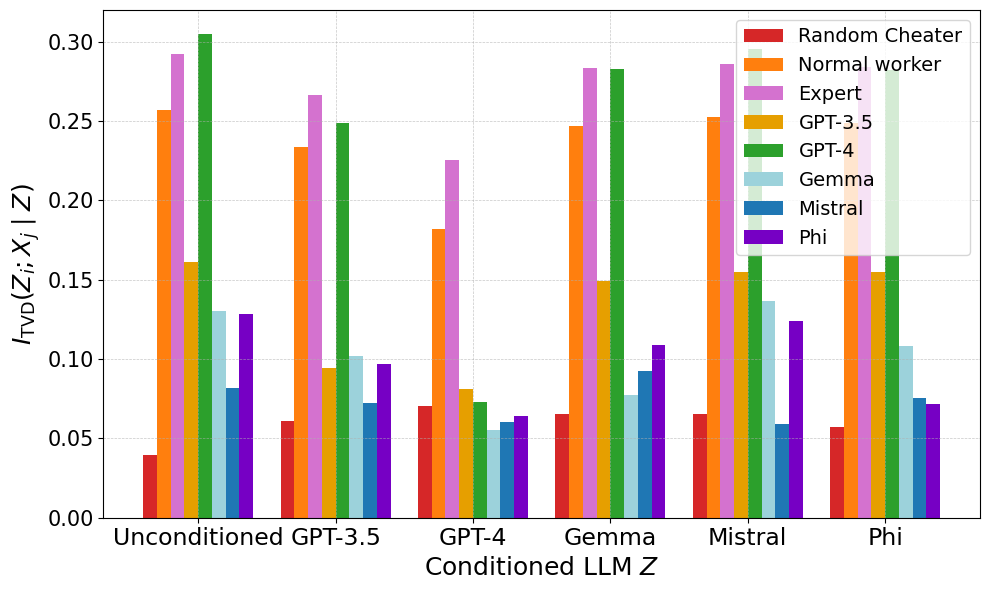

In [170]:
group_names = ['Unconditioned', 'GPT-3.5', 'GPT-4', 'Gemma', 'Mistral', 'Phi']
bar_names = names
fig_name = 'figures/tvd_divergence_Y_preference.png'
plot_grouped_bar_chart(tvd_divergence, group_names, bar_names, fig_name)

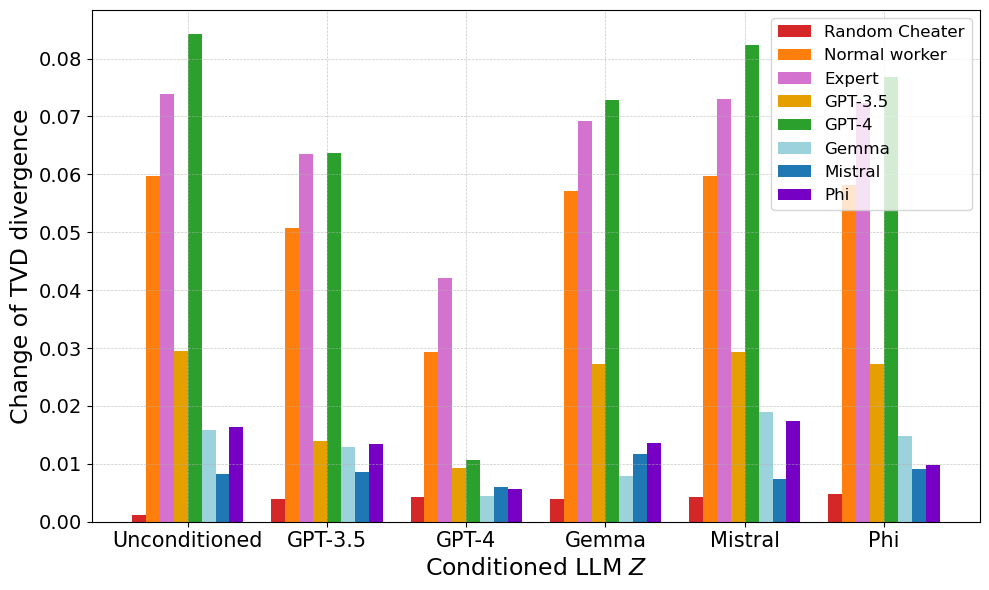

In [102]:
group_names = ['Unconditioned', 'GPT-3.5', 'GPT-4', 'Gemma', 'Mistral', 'Phi']
bar_names = names
fig_name = 'figures/kl_divergence_Y_preference.png'
plot_grouped_bar_chart(kl_divergence, group_names, bar_names, fig_name)

In [1]:
def empirical_joint_conditioned_v2(v1, v2, v3, v4, K):
    # Ensure inputs are numpy arrays
    v1 = np.array(v1)
    v2 = np.array(v2)
    v3 = np.array(v3)
    v4 = np.array(v4)
    
    # Map each value in sigma to an index
    value_to_index = {val: idx for idx, val in enumerate(list(np.arange(K)))}
    
    # Initialize conditioned joint distribution tensor
    joint_tensor = np.zeros((K, K, K, K))
    
    # Create a defaultdict to count occurrences conditioned on v3
    conditioned_counts = defaultdict(Counter)
    
    # Mask to filter out nan entries in all vectors
    mask = ~np.isnan(v1) & ~np.isnan(v2) & ~np.isnan(v3) & ~np.isnan(v4)
    
    # Extract valid triples
    valid_triples = list(zip(v1[mask], v2[mask], v3[mask], v4[mask]))
    
    # Count occurrences of each pair (v1, v2) conditioned on v3
    for a, b, c, d in valid_triples:
        i, j, k, l = value_to_index[a], value_to_index[b], value_to_index[c], value_to_index[d]
        joint_tensor[k,l,i,j] += 1
    joint_tensor = joint_tensor / len(valid_triples)
    return joint_tensor

def Divergence_conditioned_v2(joint_tensor):
    kl_divergences = 0
    tvd_divergence = 0
    supremum_norm = 0
    
    for kz in range(K):
        for ky in range(K):
            joint_matrix = joint_tensor[kz, ky]
            
            if np.sum(joint_matrix) > 0:
                joint_matrix_norm = joint_matrix/np.sum(joint_matrix)
                kl, tvd, sup = Divergence(joint_matrix_norm)
            else:
                kl, tvd, sup = 0,0,0
    
            kl_divergences += np.sum(joint_matrix)*kl
            tvd_divergence += np.sum(joint_matrix)*tvd
            supremum_norm = np.max((supremum_norm, sup))

    return kl_divergences, tvd_divergence, supremum_norm

In [3]:
K = 2
q = 2

human_data_non_nan = np.full((4, len(data)), np.nan)
for j in range(len(data)):
    non_nan = np.where(~np.isnan(human_data[:,j]))[0]
    for i in range(4):
        human_data_non_nan[i,j] = human_data[non_nan[i],j]

conditioned_list = [gpt3_data, gpt4_data, gemma_data, mistral_data, phi_data]
response_list_1 = [gpt3_data_3, gpt4_data_3, gemma_data_3, mistral_data_3, phi_data_3]
response_list_2 = [gpt3_data_2, gpt4_data_2, gemma_data_2, mistral_data_2, phi_data_2]
names = ['GPT-3.5', 'GPT-4', 'Gemma', 'Mistral', 'Phi']

tvd_cond_zz = np.zeros((len(response_list_1), len(response_list_2)))
for i, response_1 in enumerate(response_list_1):
    conditioned_r = conditioned_list[i]
    for j, response_2 in enumerate(response_list_2):
        joint_cond = empirical_joint_conditioned_v2(response_1, response_2, conditioned_r, ground_truth, K)
        kl, tvd, _ = Divergence_conditioned_v2(joint_cond)
        tvd_cond_zz[i, j] = tvd

tvd_cond_human = np.zeros(len(conditioned_list))
for i, conditioned_r in enumerate(conditioned_list):
    joint_cond = empirical_joint_conditioned_v2(human_data_non_nan[0], human_data_non_nan[2], conditioned_r, ground_truth, K)
    kl, tvd, _ = Divergence_conditioned_v2(joint_cond)
    tvd_cond_human[i] = tvd

def print_array(array):
    """
    Prints a numpy array in a nicely formatted way.
    """
    if not isinstance(array, np.ndarray):
        raise ValueError("Input must be a numpy array.")
    
    for row in array:
        print(" ".join(f"{val:10.4f}" for val in row))

print_array(tvd_cond_human[:, np.newaxis] - tvd_cond_zz)

NameError: name 'np' is not defined